<a href="https://colab.research.google.com/github/BooEazy/Project_DataScience/blob/main/Latihan/Tugas_DataScienceProjectI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Necessary Libraries
# Import Data Manipulation libraries
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.options.mode.chained_assignment = None

### <b><span style='color:#85BB65'>|</span> Domain Knowledge</b>

<br>

1. **`work_year` [categorical] :** The year the salary was paid.

2. **`experience_level` [categorical] :** The experience level in the job during the year.

3. **`employment_type` [categorical] :** The type of employment for the role.

4. **`job_title` [categorical] :** The role worked in during the year.

5. **`salary` [numerical] :** The total gross salary amount paid.

6. **`salary_currency` [categorical] :** The currency of the salary paid as an ISO 4217 currency code.

7. **`salaryinusd` [numerical] :** The salary in USD.

8. **`employee_residence` [categorical]:** Employee's primary country of residence in during the work year as an ISO 3166 country code.

9. **`remote_ratio` [ratio]:** The overall amount of work done remotely.

10. **`company_location` [categorical]:** The country of the employer's main office or contracting branch.

11. **`company_size` [categorical]:** The median number of people that worked for the company during the year as an ISO 3166 country code.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/ds_salaries.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.head(2)

# 1. Exploratory Data Analysis (EDA)

## 1.1 Check Null Values

In [ ]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## 1.2 Check Duplicate Data

In [ ]:
data.shape

(3755, 11)

In [ ]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (1171, 11)


In [ ]:
# drop duplicate data
data = data.drop_duplicates()

In [ ]:
data.shape

(2584, 11)

## 1.3 Check Unique Value in Each Column

In [ ]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [ ]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
for column in data.columns:
  if data[column].dtypes == object:

    num_distinct_values = data[column].nunique()
    distinct_values = data[column].unique()

    print(f"{column}: {num_distinct_values} -> {distinct_values}\n")

experience_level: 4 -> ['SE' 'MI' 'EN' 'EX']

employment_type: 4 -> ['FT' 'CT' 'FL' 'PT']

job_title: 93 -> ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data Scienti

## 1.4 Rename the Value for better understanding

In [ ]:
data.loc[:,'experience_level'] = data.loc[:, 'experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level'
})

data.loc[:,'employment_type'] = data.loc[:, 'employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT': 'Full-time',
    'PT': 'Part-time'
})

data.loc[:,'remote_ratio'] = data.loc[:, 'remote_ratio'].replace({
    0: 'On-Site',
    50: 'Half-Remote',
    100: 'Full-Remote'
})


In [ ]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,L
1,2023,Mid/Intermediate level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,S
2,2023,Mid/Intermediate level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,S
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,M
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,M


## 1.5 Group the Job Title

In [ ]:
print(data['job_title'].nunique())
# data['job_title'].unique()

93


In [ ]:
def assign_broader_category(job_title):
  data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
  data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
  machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
  data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
  management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]

  if job_title in data_engineering:
    return "Data Engineering"
  elif job_title in data_scientist:
    return "Data Scientist"
  elif job_title in machine_learning:
    return "Machine Learning"
  elif job_title in data_architecture:
    return "Data Architecture"
  elif job_title in management:
    return "Management"
  else:
    return "Other"

data.loc[:,'job_category'] = data['job_title'].apply(assign_broader_category)


In [ ]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,L,Other
1,2023,Mid/Intermediate level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,S,Machine Learning
2,2023,Mid/Intermediate level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,S,Machine Learning
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,M,Data Scientist
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,M,Data Scientist
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Full-Remote,US,L,Data Scientist
3751,2021,Mid/Intermediate level,Full-time,Principal Data Scientist,151000,USD,151000,US,Full-Remote,US,L,Other
3752,2020,Entry level,Full-time,Data Scientist,105000,USD,105000,US,Full-Remote,US,S,Data Scientist
3753,2020,Entry level,Contractor,Business Data Analyst,100000,USD,100000,US,Full-Remote,US,L,Data Engineering


## 1.6 Adjust Salary to Present Value

#### **<span style='color:#85BB65'>Dealing with Inflation rate</span>**
<br>

![](https://www.halifax.co.uk/assets/financial-planning-centre/inflation-projection.png)


<br>

In order to accurately compare salaries across different years, it is essential to account for inflation. Inflation is the rate at which the general price levels of goods and services increase over time. By adjusting salaries to a common currency and year, we can make meaningful comparisons between them.

<br>

![](https://timeseriesreasoning.files.wordpress.com/2021/05/88f72-1gjxkmcxhudin7t07swj0mq.png)



<br>

To adjust salaries from different years to their present value for comparison purposes. We will be using a dataset containing information on employee salaries, work years, and currency.

<br>

### <b><span style='color:#85BB65'>|</span> Explanation:</b>

<br>

1. **Define inflation rates** for the United States (US) and global markets. These rates will be used to adjust the salaries based on the year and currency.

2. Create a function **adjust_salary()** that takes a row from the dataset as input and calculates the adjusted salary based on the work year, original salary, and currency. If the work year is 2023, the salary does not need to be adjusted, and the original salary is returned.

3. Determine the **number of years between the work year and 2023** . Use the appropriate inflation rate based on the currency, either the US or global inflation rate.

4. Calculate the adjusted salary by **applying the inflation rate** to the original salary for each year from the work year to 2023.

5. **Apply the adjust_salary() function** to the dataset using the apply() method, and create a new column 'adjusted_salary' with the adjusted salary values.
<br>

> By accounting for inflation, we can gain a better understanding of the true value of salaries in different years and currencies.

In [ ]:
# Inflation rates
us_inflation_rates = {2019: 0.0181,
                      2020: 0.0123,
                      2021: 0.0470,
                      2022: 0.065}
global_inflation_rates = {2019: 0.0219,
                          2020: 0.0192,
                          2021: 0.0350,
                          2022: 0.088}

# Function to adjust salary
def adjust_salary(row):
  year = row['work_year']
  original_salary = row['salary_in_usd']
  currency = row['salary_currency']

  if year == 2023:
    return original_salary
  else:
    adjusted_salary = original_salary

    for y in range (year, 2023):
      if currency == 'USD':
        inflation_rate = us_inflation_rates[y]
      else:
        inflation_rate = global_inflation_rates[y]

      adjusted_salary = adjusted_salary * (1 + inflation_rate)

    return adjusted_salary

In [ ]:
data['adjusted_salary'] = data.apply(adjust_salary, axis=1)

In [ ]:
data[['work_year', 'salary_currency', 'salary_in_usd', 'adjusted_salary']].head()

,work_year,salary_currency,salary_in_usd,adjusted_salary
0,2023,EUR,85847,85847.0
1,2023,USD,30000,30000.0
2,2023,USD,25500,25500.0
3,2023,USD,175000,175000.0
4,2023,USD,120000,120000.0


## 1.7 Job Distribution

In [ ]:
value_counts = data['job_category'].value_counts(normalize=True) * 100
value_counts

Data Engineering     44.156347
Data Scientist       24.729102
Other                15.402477
Machine Learning      9.442724
Management            3.637771
Data Architecture     2.631579
Name: job_category, dtype: float64

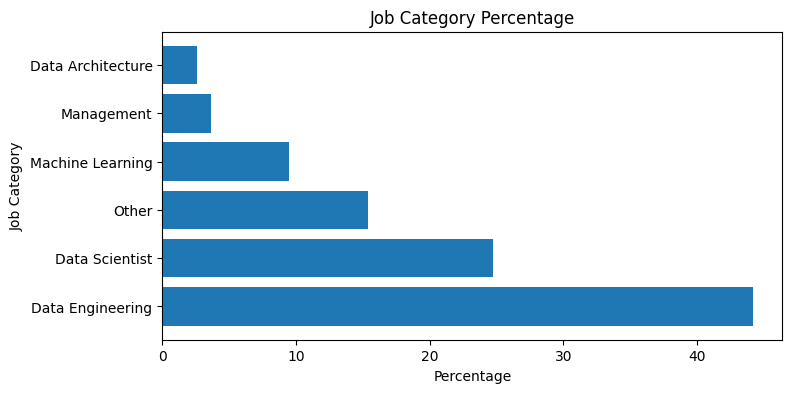

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))

ax.barh(value_counts.index, value_counts.values)
ax.set_title('Job Category Percentage')
ax.set_xlabel('Percentage')
ax.set_ylabel('Job Category')

plt.show()

## 1.8 Distribution across different employment types

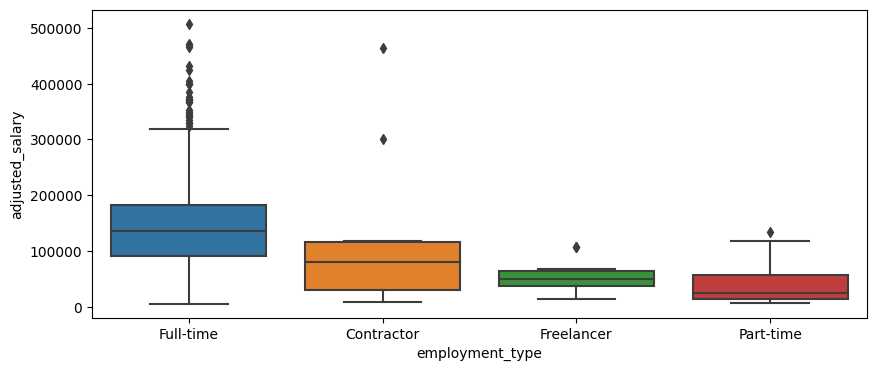

In [ ]:
plt.figure(figsize=(10,4))

sns.boxplot(data=data, x='employment_type', y='adjusted_salary')

plt.show()

## 1.9 Distribution of Salary

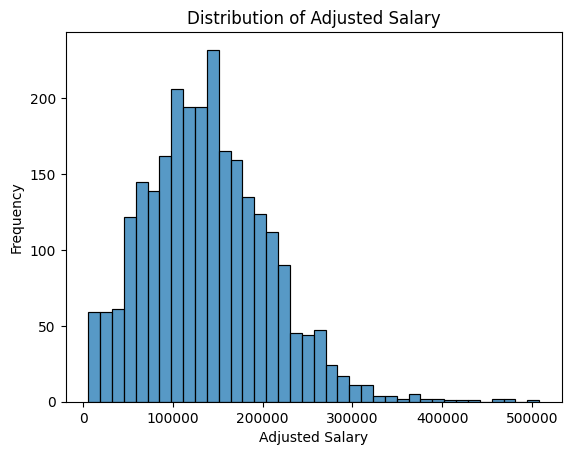

In [ ]:
sns.histplot(data['adjusted_salary'])

plt.title('Distribution of Adjusted Salary')
plt.ylabel('Frequency')
plt.xlabel('Adjusted Salary')
plt.show()

## 1.10 Boxplot and Swarmplot of Adjusted Salary

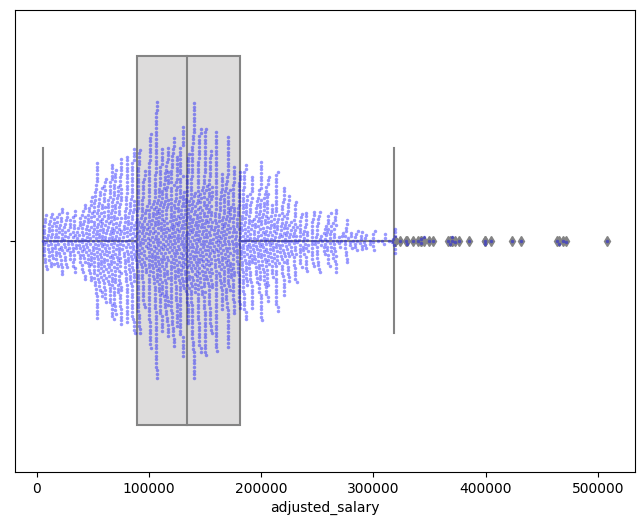

In [ ]:
plt.figure(figsize=(8,6))

sns.boxplot(x=data['adjusted_salary'], palette='coolwarm')
sns.swarmplot(x=data['adjusted_salary'], color='blue', alpha=0.4, size=2.5)

plt.show()

In [ ]:
data['adjusted_salary'].describe()

count      2584.000000
mean     138560.259727
std       69092.951905
min        5583.616000
25%       89460.000000
50%      134318.173494
75%      181050.000000
max      507946.579425
Name: adjusted_salary, dtype: float64

# 2. Answer These Questions
- Show the **median** adjusted data scientist salary, for each experience level
- Show the number of records for each company_location, sorted descending
- From this data, show the **median** adjusted salary of employee who works for company located in Indonesia (ID), do you think that value represents the salary in Indonesia? why? why not?

1. Show the median adjusted data scientist salary, for each experience level

In [ ]:
# Menampilkan data dari job_category hanya Data Scientist
df= pd.DataFrame(data)
df_tampildata = df[df['job_category'] == 'Data Scientist']
df_tampildata.reset_index()

,index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,adjusted_salary
0,3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,M,Data Scientist,175000.000000
1,4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,M,Data Scientist,120000.000000
2,5,2023,Senior,Full-time,Applied Scientist,222200,USD,222200,US,On-Site,US,L,Data Scientist,222200.000000
3,6,2023,Senior,Full-time,Applied Scientist,136000,USD,136000,US,On-Site,US,L,Data Scientist,136000.000000
4,7,2023,Senior,Full-time,Data Scientist,219000,USD,219000,CA,On-Site,CA,M,Data Scientist,219000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,3741,2020,Mid/Intermediate level,Full-time,Data Scientist,118000,USD,118000,US,Full-Remote,US,M,Data Scientist,133194.880827
635,3742,2020,Mid/Intermediate level,Full-time,Data Scientist,138350,USD,138350,US,Full-Remote,US,M,Data Scientist,156165.353919
636,3746,2021,Mid/Intermediate level,Full-time,Data Scientist,160000,SGD,119059,SG,Full-Remote,IL,M,Data Scientist,134069.958720
637,3750,2020,Senior,Full-time,Data Scientist,412000,USD,412000,US,Full-Remote,US,L,Data Scientist,465053.312718


In [ ]:
# Mencari median dari setiap experince_level
df_hitungmedian = df_tampildata.groupby('experience_level').agg({
    'salary' : 'median',
    'adjusted_salary' : 'median',

})

df_hitungmedian.reset_index()

,experience_level,salary,adjusted_salary
0,Entry level,98000.0,82715.648
1,Executive level,159000.0,169335.000
2,Mid/Intermediate level,100000.0,95850.000
3,Senior,158438.5,162722.500


2. Show the number of records for each company_location, sorted descending

In [ ]:
# Dihitung berdasarkan berapa kalo company_location muncul.
# note: yang dimaksud catatan hitung adalah berapa kali negara ini ada di tabel
df_tampil_location1 = data['company_location'].value_counts()
df_tampil_location1

US    1929
GB     155
CA      83
IN      57
DE      55
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [ ]:
# menampilkan data hasil hitung secara descending
df_tampil_location1 = df_tampil_location1.sort_values(ascending=False).reset_index()
df_tampil_location1

,index,company_location
0,US,1929
1,GB,155
2,CA,83
3,IN,57
4,DE,55
...,...,...
67,BS,1
68,IR,1
69,CR,1
70,MA,1


3. From this data, show the median adjusted salary of employee who works for company located in Indonesia (ID), do you think that value represents the salary in Indonesia? why? why not?

In [ ]:
# tampilin data yang ada di indonesia atau "ID"
df= pd.DataFrame(data)
df_dataindonesia = df[df['company_location'] == 'ID']
df_dataindonesia.reset_index()

,index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,adjusted_salary
0,3061,2022,Mid/Intermediate level,Full-time,Data Scientist,4200000,INR,53416,IN,Full-Remote,ID,L,Data Scientist,58116.608
1,3139,2022,Entry level,Full-time,Data Analyst,15000,USD,15000,ID,On-Site,ID,L,Data Engineering,15975.000


In [ ]:
# hitung median dari data
df_hitungmedian = df_dataindonesia.groupby('experience_level').agg({
    'salary' : 'median',
    'adjusted_salary' : 'median',
    'salary_currency' : 'first'
})

df_hitungmedian.reset_index()

,experience_level,salary,adjusted_salary,salary_currency
0,Entry level,15000.0,15975.000,USD
1,Mid/Intermediate level,4200000.0,58116.608,INR


Menurut saya, data diatas sama sekali tidak mewakili gaji di indonesia. kenapa? karna dari data diatas jika kita konversikan ke IDR hasil tersebut jauh sekali dari gaji rata rata pekerja di indonesia. dimana jika kita konversikan data dari tabel ke IDR sebagai berikut. Rata-rata pada data untuk entry level adalah 15000 USD dimana itu sama saja dengan RP 232.932.750,00 pertahun. Sedangkan Pertahun 2023 ini saja rata-rata gaji pekerja entry level(Junior) di indonesia adalah Rp 80.389.705 pertahun. Dimana perbulan hanya Rp 6.699.142 (Sumber: indeed.com).

Kemudian, rata-rata pada data untuk Mid/intermediate level adalah 4200000 INR dimana itu sama saja dengan Rp.784.354.200 pertahun. Sedangkan pertahun 2023 ini saja rata-rata gaji pekerja Mid/Intermediate di Indonesia adalah Rp 205.157.648. Dimana perbulan hanya Rp 14.525.501 (Sumber: indeed.com).

Dari perbandingan diatas bisa ditarik kesimpulan bahwa gaji pada data. Tidak bisa mewakili gaji pekerja di Indonesia. tetapi tidak menutup kemungkinan ada gaji yang sama atau sesuai dengan data. Menurut saya, hal ini kembali lagi ke kebijakan perusahaan tersebut yang memberikan gaji pada pekerja di Indonesia.  